In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sales=pd.read_csv('Rossmann_train.csv')
stores=pd.read_csv('Rossmann_store.csv')

store = sales.groupby(["Store"]).sum()
store = store.drop(columns = "DayOfWeek")

data=pd.merge(store,stores, on = "Store")



C:\Users\steve\AppData\Local\Temp\ipykernel_16472\3791988440.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales=pd.read_csv('Rossmann_train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


633.1459464082602

In [4]:
average_sales_by_assortment = data.groupby('Assortment')['Sales'].mean()
Total_sales_by_assortment = data.groupby('Assortment')['Sales'].sum()
print(Total_sales_by_assortment)
print(average_sales_by_assortment)
highest_average_sales_assortment = average_sales_by_assortment.idxmax()
print("The highest average sales for assortment is:", highest_average_sales_assortment)

Assortment
a    2945750070
b      70946312
c    2856484241
Name: Sales, dtype: int64
Assortment
a    4.967538e+06
b    7.882924e+06
c    5.568195e+06
Name: Sales, dtype: float64
The highest average sales for assortment is: b


In [5]:
average_sales_by_store_type = data.groupby('StoreType')['Sales'].mean()
Total_sales_by_store_type = data.groupby('StoreType')['Sales'].sum()
print(Total_sales_by_store_type)
print(average_sales_by_store_type)
highest_average_sales_assortment = average_sales_by_store_type.idxmax()
print("The highest average sales for store type is:", highest_average_sales_assortment)

StoreType
a    3165334859
b     159231395
c     783221426
d    1765392943
Name: Sales, dtype: int64
StoreType
a    5.258031e+06
b    9.366553e+06
c    5.292037e+06
d    5.072968e+06
Name: Sales, dtype: float64
The highest average sales for store type is: b


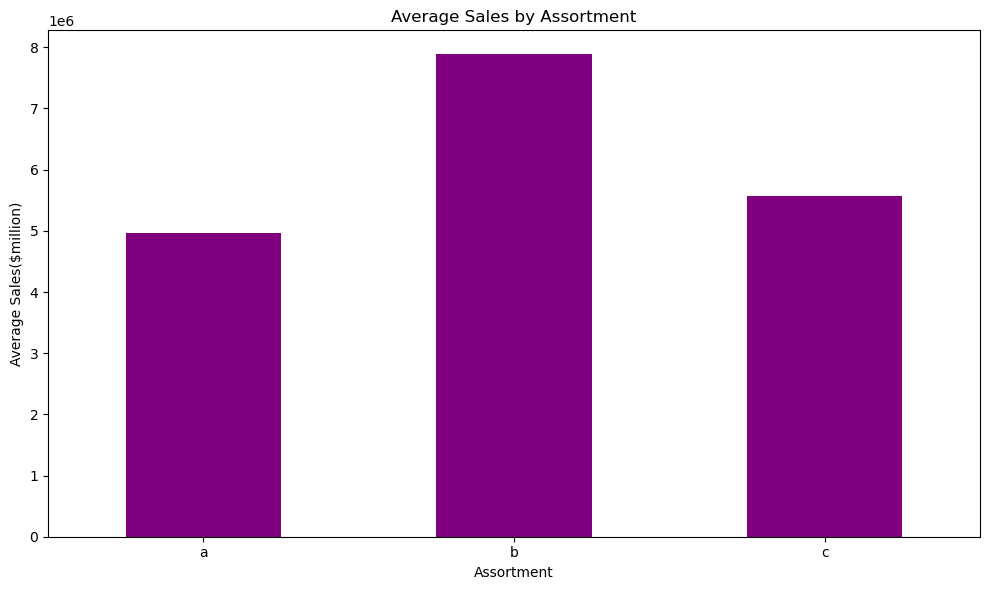

In [6]:
import matplotlib.pyplot as plt
assortment_sales_avg = data.groupby('Assortment')['Sales'].mean()
plt.figure(figsize=(10, 6))
assortment_sales_avg.plot(kind='bar', color='purple')
plt.title('Average Sales by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Average Sales($million)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


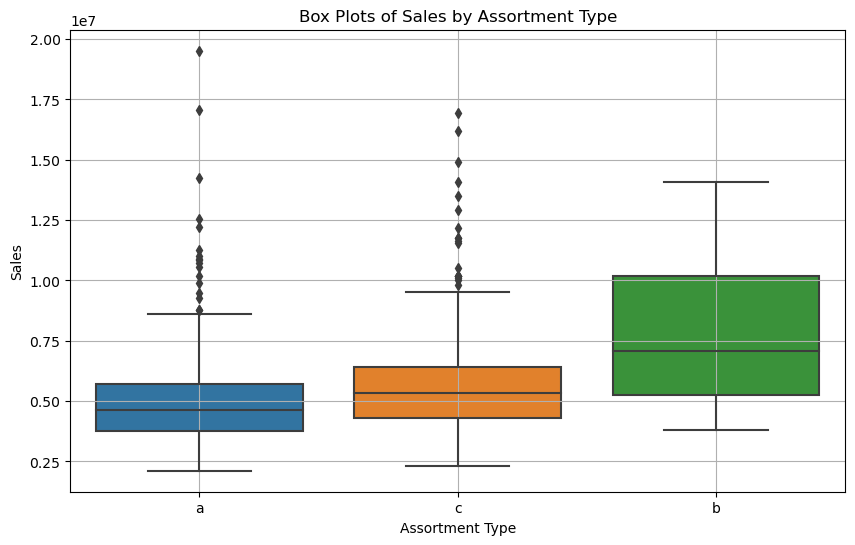

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and merged the data as 'data'

# Create box plots for each assortment type and their sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=data)
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.title('Box Plots of Sales by Assortment Type')
plt.grid(True)

# Show the plot
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
data.fillna(0, inplace=True)
label_encoder = LabelEncoder()
data['Assortment'] = label_encoder.fit_transform(data['Assortment'])

X = data[['Assortment', 'Customers']]  
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 746392.8863581235
Root Mean Squared Error (RMSE): 1033898.6445781661


In [30]:
import pandas as pd
assortment_types = [1, 2, 3]
customers = [500, 600, 700]  

predicted_sales = []

for assortment_type, customer_count in zip(assortment_types, customers):
    new_data_point = pd.DataFrame({'Assortment': [assortment_type], 'Customers': [customer_count]})
    sales_prediction = model.predict(new_data_point)
    predicted_sales.append(sales_prediction[0])

# Print the predicted sales for each assortment type
for i, assortment_type in enumerate(assortment_types):
    print(f"Predicted Sales for Assortment Type {assortment_type}: {predicted_sales[i]}")


Predicted Sales for Assortment Type 1: 2114540.5042106267
Predicted Sales for Assortment Type 2: 2348699.2770945043
Predicted Sales for Assortment Type 3: 2582858.049978382


Mean Absolute Error (MAE): 746392.8863581235
Root Mean Squared Error (RMSE): 1033898.6445781661


In [10]:

average_sales_by_store_type = data.groupby('StoreType')['Sales'].mean()
Total_sales_by_store_type = data.groupby('StoreType')['Sales'].sum()
print(Total_sales_by_store_type)
print(average_sales_by_store_type)
highest_average_sales_assortment = average_sales_by_store_type.idxmax()
print("The highest average sales for store type is:", highest_average_sales_assortment)

StoreType
a    3165334859
b     159231395
c     783221426
d    1765392943
Name: Sales, dtype: int64
StoreType
a    5.258031e+06
b    9.366553e+06
c    5.292037e+06
d    5.072968e+06
Name: Sales, dtype: float64
The highest average sales for store type is: b


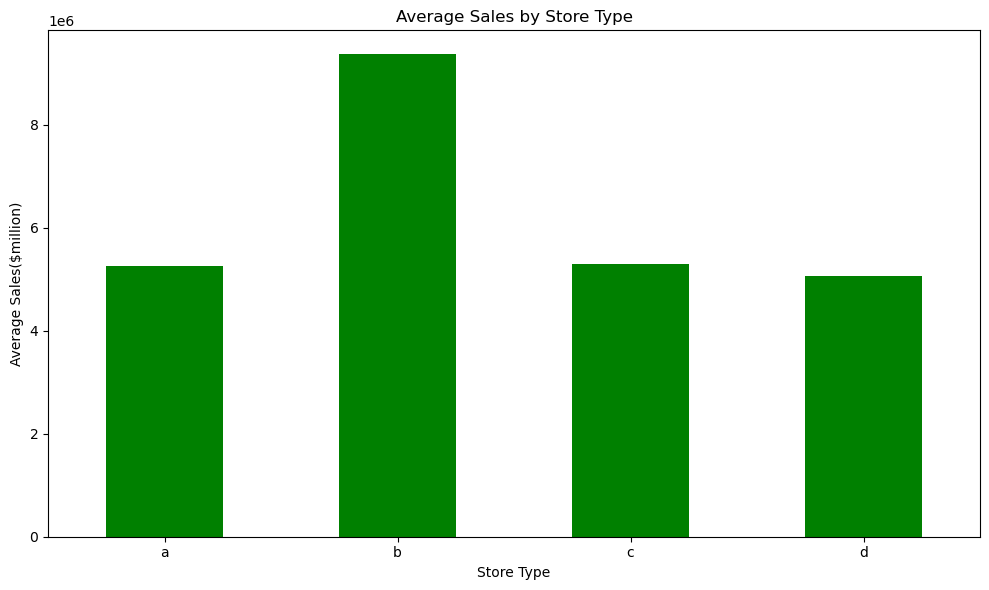

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
average_sales_by_store_type.plot(kind='bar', color='Green')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales($million)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


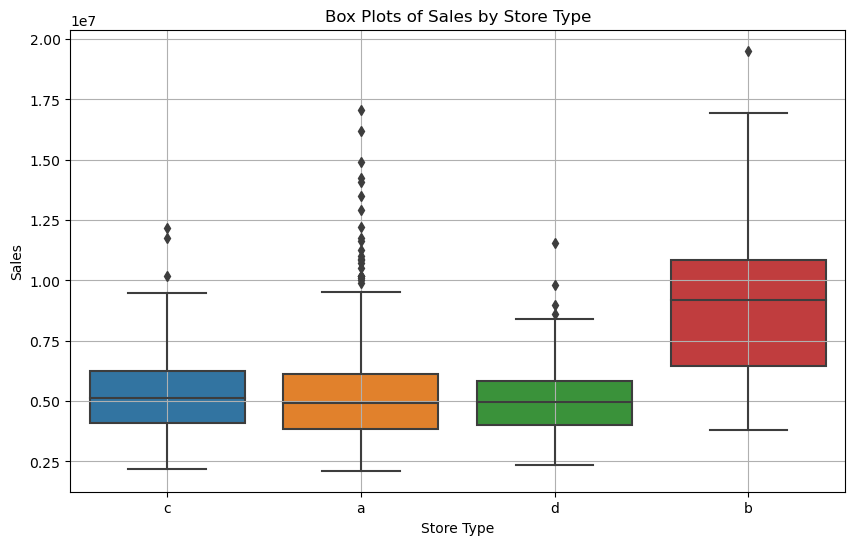

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and merged the data as 'data'

# Create box plots for each assortment type and their sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=data)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Box Plots of Sales by Store Type')
plt.grid(True)
# Show the plot
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handle missing data (e.g., fill with zeros)
data.fillna(0, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['StoreType'] = label_encoder.fit_transform(data['StoreType'])

# Split data into features (X) and target (y)
X = data[['StoreType', 'Customers']]  # Include 'Customers' as a predictor
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 749576.4973863965
Root Mean Squared Error (RMSE): 1042046.6500783765


In [21]:
import pandas as pd


store_types = [1, 2, 3, 4]
customers = [50, 60, 70, 80]  
predicted_sales = []

for store_type, customer_count in zip(store_types, customers):
    new_data_point = pd.DataFrame({'StoreType': [store_type], 'Customers': [customer_count]})
    sales_prediction = model.predict(new_data_point)
    predicted_sales.append(sales_prediction[0])

for i, store_type in enumerate(store_types):
    print(f"Predicted Sales for Store Type {store_type}: {predicted_sales[i]}")


Predicted Sales for Store Type 1: 1948688.9681154937
Predicted Sales for Store Type 2: 2141661.952078369
Predicted Sales for Store Type 3: 2334634.936041245
Predicted Sales for Store Type 4: 2527607.92000412
